In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.9 MB/s 
     |████████████████████████████████| 163 kB 51.4 MB/s 
     |████████████████████████████████| 7.6 MB 30.4 MB/s 


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tabulate import tabulate
from tqdm import trange
import random

In [ ]:
df = pd.read_csv('/content/as_a.csv')
df = df.sort_values(by=['storypoint'])
df.head()

,Unnamed: 0,Unnamed: 0.1,issuekey,title,description,storypoint,project
0,21,21,TISTUD-64,implement tiappxml validation,as an example see httpdeveloperappceleratorcom...,1,appceleratorstudio
165,15379,16899,XD-2246,document default behavior if config option is ...,as a user id like to have the flexibility to s...,1,springxd
348,15921,17497,XD-2881,identify and fix dependency conflicts in dirt cp,as a developer i need to investigate the diffe...,1,springxd
602,16466,18075,XD-3494,document how to use to bom template,as a scd developer id like to document the use...,1,springxd
600,16464,18073,XD-3492,move headerenricher to xd proper,as a xd developer id like to move headerenrich...,1,springxd


In [ ]:
distinct_labels = []
for label in df.storypoint.values:
  if label not in distinct_labels:
    distinct_labels.append(label)
distinct_labels

[1, 2, 3, 4, 5, 6, 8, 10, 13, 17, 20, 21, 40]

In [ ]:
size = len(df)
print(size)
prop = size/len(distinct_labels)
remove = []
for i in distinct_labels:
  count = len(df.storypoint.values[df.storypoint.values == i])
  if count < prop * 0.2:
    remove.append(i)
  print(f'{i} : {count}')

805
1 : 113
2 : 130
3 : 187
4 : 4
5 : 157
6 : 1
8 : 198
10 : 1
13 : 8
17 : 2
20 : 2
21 : 1
40 : 1


In [ ]:
remove

[4, 6, 10, 13, 17, 20, 21, 40]

In [ ]:
for i in remove:
  distinct_labels.remove(i)
  df = df[df['storypoint'] != i]

In [ ]:
len(df)

785

In [ ]:
x = df.title.values + df.description.values
y = df.storypoint.values

In [ ]:
x[:5]

array(['implement tiappxml validationas an example see httpdeveloperappceleratorcomquestion114521errorerrorgener',
       'document default behavior if config option is not presentas a user id like to have the flexibility to specify config options for ip and hostname so that i can list the correct configuration for xd admin and xd container servers in the adminui and shell',
       'identify and fix dependency conflicts in dirt cpas a developer i need to investigate the differences in dependency versions so when i createdeploy custom modules in xd i dont run into cpcl issues',
       'document how to use to bom templateas a scd developer id like to document the use of bom templates so the general audience can use it as a reference to include external libraries dynamically',
       'move headerenricher to xd properas a xd developer id like to move headerenricher from modules repo to xd proper'],
      dtype=object)

In [ ]:
y[:5]

array([1, 1, 1, 1, 1])

In [ ]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case = True
)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
token_id = []
attention_masks = []

def preprocessing(input_text, tokenizer):
  '''
  Returns <class transformers.tokenization_utils_base.BatchEncoding> with the following fields:
    - input_ids: list of token ids
    - token_type_ids: list of token type ids
    - attention_mask: list of indices (0,1) specifying which tokens should considered by the model (return_attention_mask = True).
  '''
  return tokenizer.__call__(
                        input_text,
                        add_special_tokens = True,
                        max_length = 50,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                   )


for sample in x:
  encoding_dict = preprocessing(sample, tokenizer)
  token_id.append(encoding_dict['input_ids']) 
  attention_masks.append(encoding_dict['attention_mask'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
token_id = normalize(token_id)

In [ ]:
token_id[0]

array([0.0011336 , 0.11681703, 0.30684672, 0.10546979, 0.02912569,
       0.22411629, 0.30701508, 0.03391824, 0.0226608 , 0.03077558,
       0.02419845, 0.09314609, 0.27884341, 0.205945  , 0.05434551,
       0.32658933, 0.3267128 , 0.07751137, 0.04784694, 0.1010813 ,
       0.17396848, 0.03656705, 0.16303652, 0.22403772, 0.19602319,
       0.02380562, 0.32734133, 0.02380562, 0.32734133, 0.07760116,
       0.02380562, 0.00114482, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
count = 0
for token in token_id:
  if token[-1] != 0:
    count += 1
print(count)

308


In [ ]:
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ids = [f'{id} : {storypoint}' for id, storypoint in zip(df.issuekey.values, df.storypoint.values)]
distance_matrixx = distance_matrix(token_id, token_id)

In [ ]:
distance_matrixx

array([[0.        , 0.81916209, 1.11313967, ..., 0.91481074, 0.93674185,
        1.0379841 ],
       [0.81916209, 0.        , 1.08654897, ..., 0.85392001, 1.02792707,
        1.0206191 ],
       [1.11313967, 1.08654897, 0.        , ..., 1.06665163, 1.09421005,
        1.01497013],
       ...,
       [0.91481074, 0.85392001, 1.06665163, ..., 0.        , 1.05050205,
        0.87300905],
       [0.93674185, 1.02792707, 1.09421005, ..., 1.05050205, 0.        ,
        0.97913   ],
       [1.0379841 , 1.0206191 , 1.01497013, ..., 0.87300905, 0.97913   ,
        0.        ]])

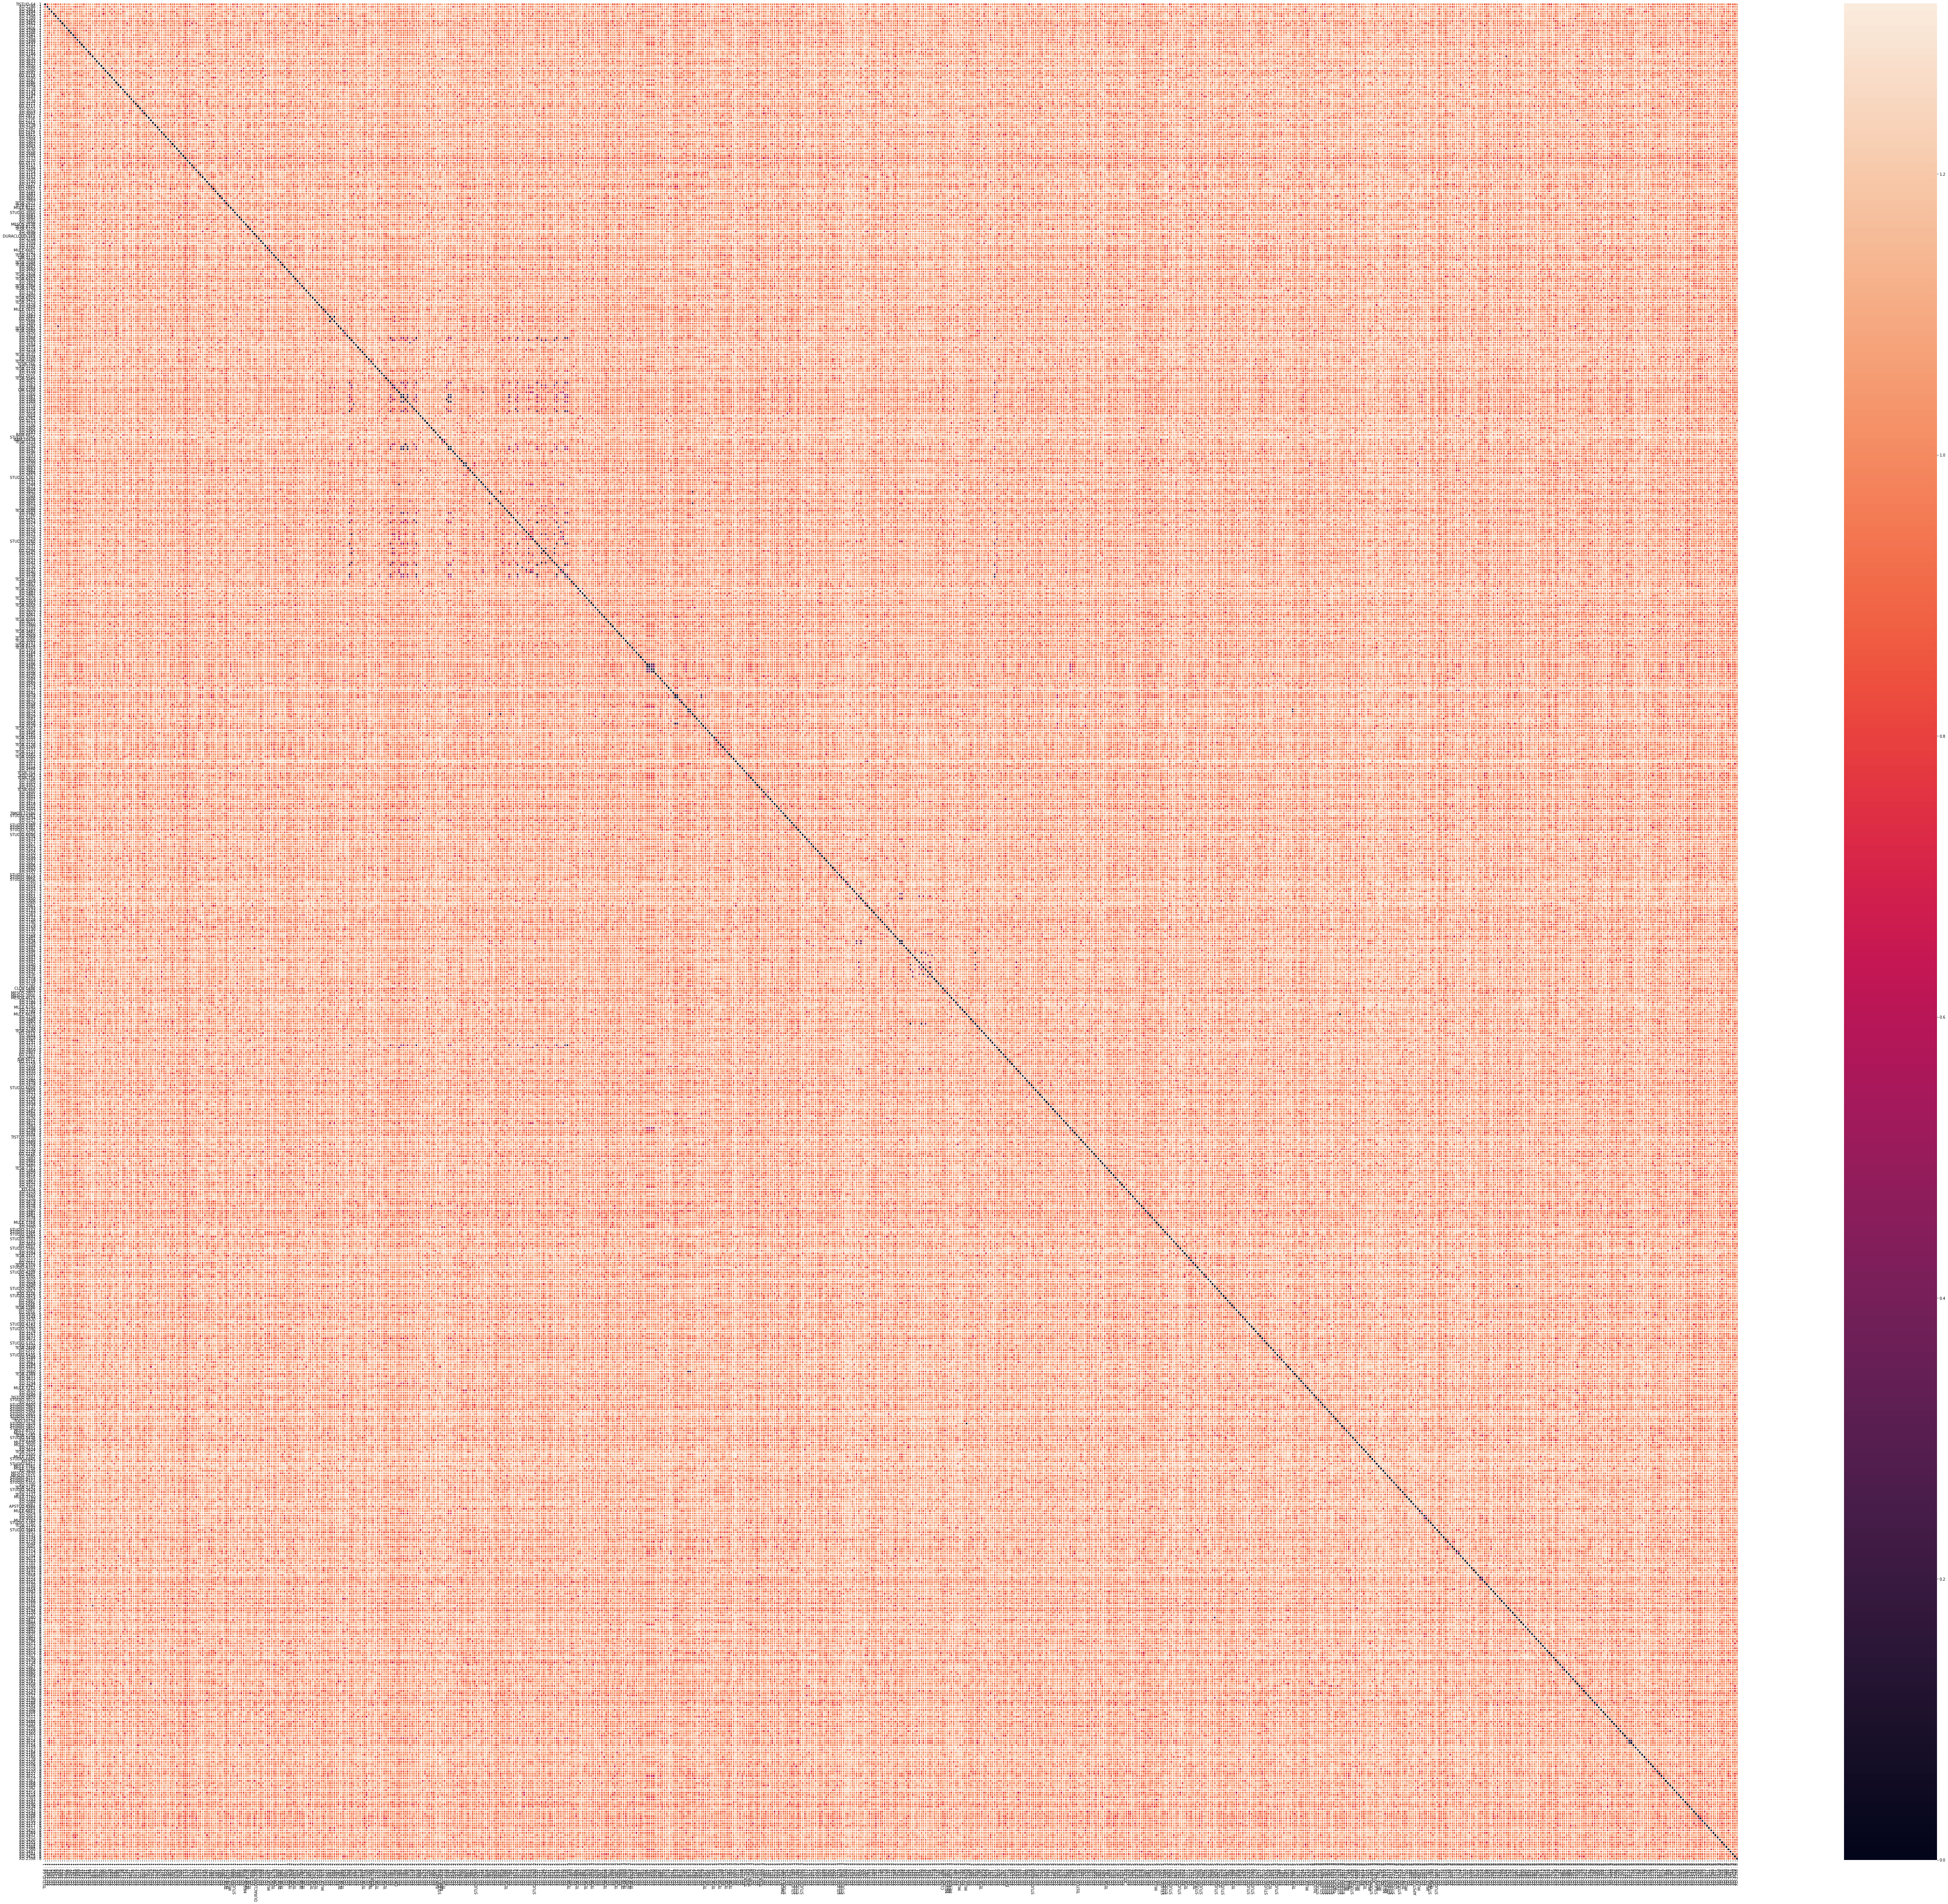

In [ ]:
fig, ax = plt.subplots(figsize=(100, 90))
ax = sns.heatmap(distance_matrixx, annot=False, linewidths=.5, xticklabels=ids, yticklabels=ids)
plt.show()

In [ ]:
x = token_id

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2) 

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(x_test) 

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm = confusion_matrix(y_test, y_pred)

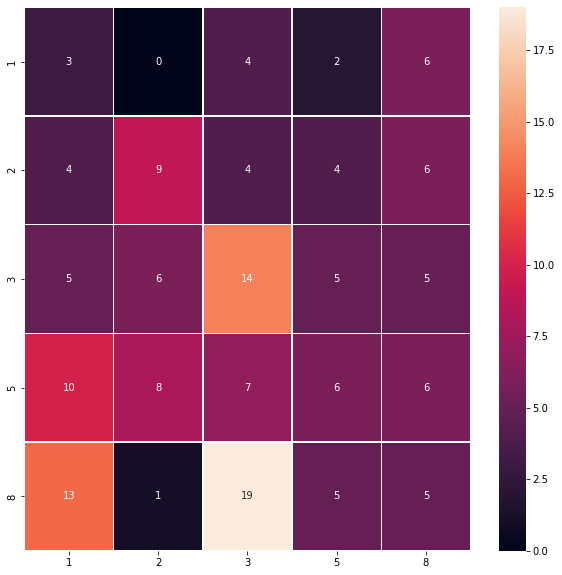

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm, annot=True, linewidths=.5, xticklabels=distinct_labels, yticklabels=distinct_labels)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.2356687898089172

**SVC**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(gamma='auto')
classifier.fit(x_train, y_train)

SVC(gamma='auto')

In [ ]:
y_pred= classifier.predict(x_test)  

In [ ]:
cm = confusion_matrix(y_test, y_pred) 

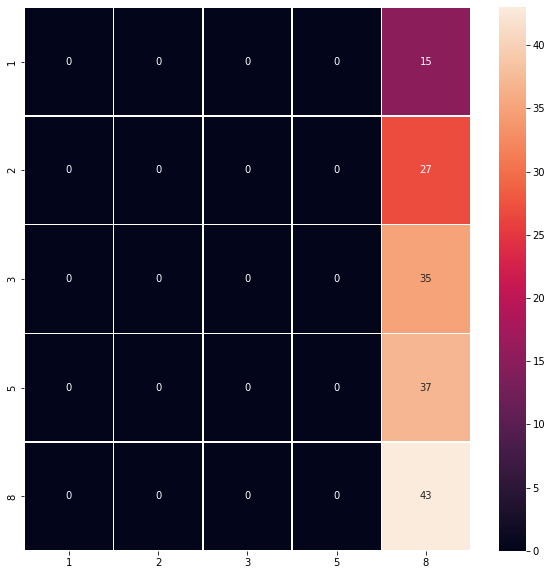

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm, annot=True, linewidths=.5, xticklabels=distinct_labels, yticklabels=distinct_labels)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.27388535031847133

**Decision Tree**

In [ ]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred) 

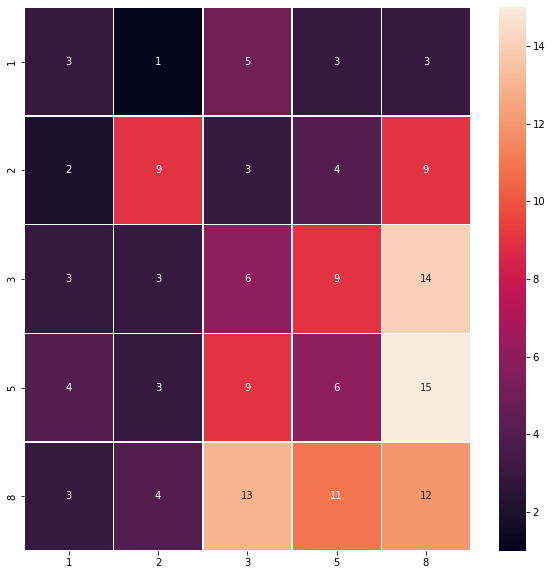

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm, annot=True, linewidths=.5, xticklabels=distinct_labels, yticklabels=distinct_labels)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.22929936305732485

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
accuracy_list = []

for i in range (1,100):
  classifier = RandomForestClassifier(n_estimators=i, max_samples=0.6, max_features=20)
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)

  accuracy_list.append(accuracy_score(y_test, y_pred))

Text(0.5, 1.0, 'Accuracy with respect no.of trees')

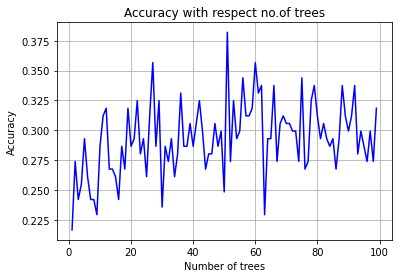

In [ ]:
plt.plot(range(1, 100), accuracy_list, color ='blue')
plt.grid()
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Accuracy with respect no.of trees")

In [ ]:
accuracy_list = []

for i in range (1,50):
  classifier = RandomForestClassifier(n_estimators=50, max_samples=0.6, max_features=i)
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)

  accuracy_list.append(accuracy_score(y_test, y_pred))

Text(0.5, 1.0, 'Accuracy with respect no.of features')

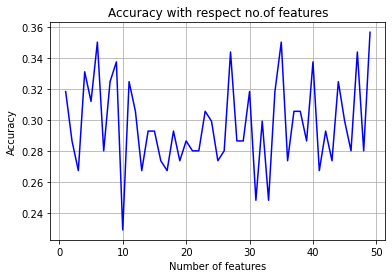

In [ ]:
plt.plot(range(1, 50), accuracy_list, color ='blue')
plt.grid()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Accuracy with respect no.of features")